## 01: Importieren der notwendigen Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

## 02: Datensatz laden und erste Übersicht über den Inhalt

In [2]:
# Datensatz wurde geladen mit folgenden Funktionen:
# df = pd.read_csv("URL")
# df.to_csv("Name der Datei", index=False)

df = pd.read_csv("tiktok_dataset.csv")

| Name der Spalte            | Typ   | Beschreibung                                                                                                                                                                                                                                                                                                        |
|----------------------------|-------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| #                          | int   | Von TikTok zugewiesene Nummer für Video mit Anspruch/Meinung.                                                                                                                                                                                                                                                       |
| claim_status               | obj   | Ob das veröffentlichte Video als "Meinung" oder als "Behauptung" identifiziert wurde. In diesem Datensatz bezieht sich eine "Meinung" auf die persönliche Überzeugung einer Person oder Gruppe. Eine "Behauptung" bezieht sich auf Informationen, die entweder ohne Quellenangabe oder von einer nicht verifizierten Quelle stammen.                 |
| video_id                   | int   | Zufällige Identifikationsnummer, die dem Video bei der Veröffentlichung auf TikTok zugewiesen wird.                                                                                                                                                                                                                  |
| video_dauer_sec            | int   | Die Länge des veröffentlichten Videos in Sekunden.                                                                                                                                                                                                                                                                   |
| video_transkription_text   | obj   | Transkribierter Text der Worte, die in dem veröffentlichten Video gesprochen werden.                                                                                                                                                                                                                                 |
| verifiziert_status         | obj   | Gibt den Status des TikTok-Benutzers, der das Video veröffentlicht hat, in Bezug auf seine Verifizierung an, entweder "verifiziert" oder "nicht verifiziert".                                                                                                                                                         |
| autor_verbot_status        | obj   | Zeigt den Status des TikTok-Benutzers, der das Video veröffentlicht hat, in Bezug auf seine Berechtigungen an: "aktiv", "unter Beobachtung" oder "gesperrt".                                                                                                                                                         |
| video_view_count           | float | Die Gesamtzahl, wie oft das veröffentlichte Video angesehen wurde.                                                                                                                                                                                                                                                  |
| video_like_count           | float | Die Gesamtzahl, wie oft das veröffentlichte Video von anderen Benutzern geliked wurde.                                                                                                                                                                                                                               |
| video_share_count          | float | Die Gesamtzahl, wie oft das veröffentlichte Video von anderen Nutzern geteilt wurde.                                                                                                                                                                                                                                |
| video_download_count       | float | Die Gesamtzahl, wie oft das veröffentlichte Video von anderen Nutzern heruntergeladen wurde.                                                                                                                                                                                                                        |
| video_kommentar_zählung    | float | Die Gesamtzahl der Kommentare zu dem veröffentlichten Video.                                                                                                                                                                                                                                                        |


In [3]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
df.sample(n=15)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
5542,5543,claim,8374141529,20,i read in a discussion board that mercury & v...,not verified,active,600881.0,242444.0,37673.0,2354.0,162.0
6969,6970,claim,2075564626,15,a colleague read on social media a claim that...,not verified,active,791012.0,400197.0,1889.0,5332.0,1631.0
17913,17914,opinion,6114104223,27,my friends are willing to bet that our sense o...,not verified,active,795.0,127.0,26.0,3.0,0.0
4362,4363,claim,9890716489,51,someone read in the media that the longest re...,not verified,active,250493.0,154067.0,52380.0,1669.0,1089.0
17786,17787,opinion,9668131015,20,my friends are willing to wager that the most ...,not verified,active,8670.0,3740.0,187.0,42.0,2.0
4863,4864,claim,3455876455,18,i learned in a discussion board a claim that ...,not verified,active,473296.0,54409.0,164.0,584.0,138.0
13119,13120,opinion,2312102478,50,our position is that no two tongue prints are ...,verified,active,5850.0,2307.0,275.0,55.0,17.0
1817,1818,claim,8503633294,25,a friend learned in the media a claim that th...,not verified,active,241461.0,31455.0,1952.0,487.0,163.0
18171,18172,opinion,1622800427,55,my family is willing to bet that 4 of the top ...,not verified,active,4363.0,1050.0,255.0,20.0,4.0
17113,17114,opinion,8184294930,27,i can say that koalas sleep up to 22 hours per...,not verified,active,944.0,152.0,29.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [7]:
# Alle Werte bei denen keine Einträge gefunden wurden

df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

## 03: Bearbeitung / Bereinigung des Datensatzes

In [8]:
# Alle Werte bei denen keine Einträge gefunden wurden

df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
df_missing = df[df.isna().any(axis=1)]

In [10]:
pd.set_option('display.max_rows', len(df_missing))
df_missing
pd.reset_option('display.max_rows')

# Für die vollständige, angezeigt Liste der fehlenden Daten einfach ein # vor pd.reset_option('display.max_rows') setzen
# Es wurden nicht ausreichend Daten in dem Datensatz bei NaN Werten ausgefüllt.
# Diese Daten werden gelöscht

In [11]:
df = df.dropna()

In [12]:
# Alle Werte bei denen keine Einträge gefunden wurden

df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


## 04: Tieferes Verständnis der Daten

In [14]:
# Wie of wurde ein Video als Behauptung (claim) oder als Meinung (opinion) gekennzeichnet
# Bei der Menge an Daten ist es relativ ausgewogen

df['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [15]:
# Boolian Filter für nur Videos mit "claim"
# Daraus dann Durchschnitt und Meadian berechnen

# Durchschnittliche views mit Status "claim""

claims = df[df['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [16]:
# Durchschnittliche views mit Status "opinion""

opinions = df[df['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


In [17]:
# Durchschnitt und Median liegen bei beiden Kategorien nah aneinander
# Allerdings großer Unterschied zwischen den views

# Anzahl kombinierte Möglichkeiten mit dem Status mit dem Bann Status

df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

# Möglichkeiten:
# Behauptungsvideos unterliegen strengeren Kontrollen als Meinungsvideos
# Autoren müssen strengere Regeln einhalten, wenn sie eine Behauptung veröffentlichen, als wenn sie eine Meinung veröffentlichen.

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

In [18]:
# Durchschnitt und Median für für die verschiedenen Bann Kategorien

df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [19]:
# What's the median video share count of each author ban status?
# Durchschnittliche Anzahl an "Video teilen" für die jeweiligen Bann Stadien

# Die durchschnittliche Anzahl der Shares gesperrter Autoren ist 33 Mal so hoch wie die der aktiven Autoren!

df.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


In [20]:
# Daten gruppieren und als Dict aufbauen

df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

# Gesperrte und überprüfte Autoren erhalten weitaus mehr Aufrufe, Likes und Shares als aktive Autoren.
# In den meisten Gruppen ist der Mittelwert viel höher als der Median, was darauf hinweist, dass es einige Videos mit sehr hohen Aufruf-Zahlen gibt.

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

In [21]:
# Neues likes_per_view Column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Neues comments_per_view Column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']

# Neues shares_per_view Column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']

In [22]:
df.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

## 05: Visualisierungen

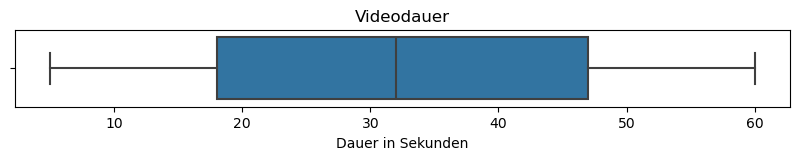

In [23]:
# Boxplot zur für die Verteilung der Videodauer

plt.figure(figsize=(10,1))
plt.title('')
sns.boxplot(x=df['video_duration_sec'])
plt.title("Videodauer")
plt.xlabel(xlabel="Dauer in Sekunden")
plt.show()


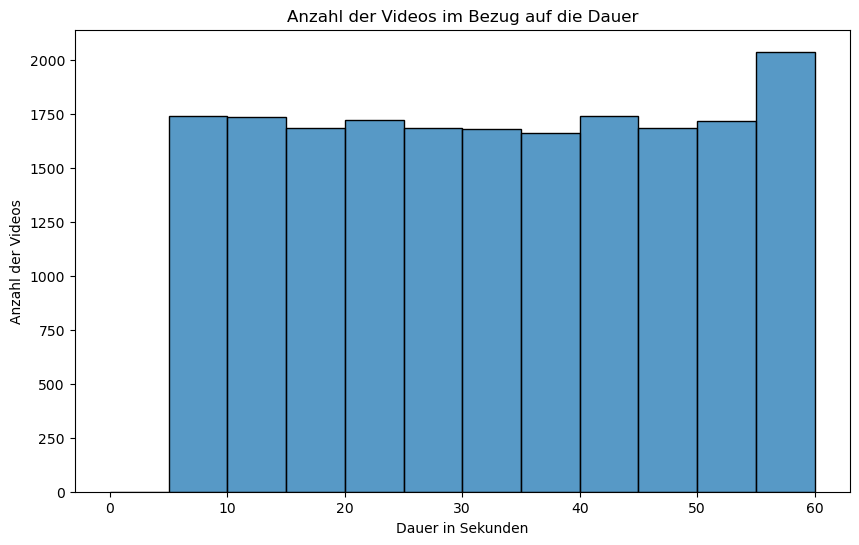

In [24]:
# histogramm für die Verteilung der Videos 

plt.figure(figsize=(10,6))
sns.histplot(df['video_duration_sec'], bins=range(0,61,5))
plt.title('Anzahl der Videos im Bezug auf die Dauer')
plt.xlabel(xlabel="Dauer in Sekunden")
plt.ylabel(ylabel="Anzahl der Videos")
plt.show()

# Alle Videos sind zwischen 5 und 50 Sekunden und etwa gleich verteilt

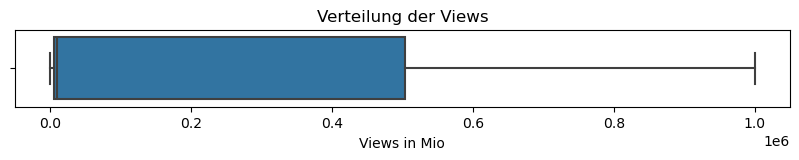

In [25]:
# boxplot zur Verteilung der Video Views

plt.figure(figsize=(10, 1))
plt.title('Verteilung der Views')
sns.boxplot(x=df['video_view_count'])
plt.xlabel(xlabel="Views in Mio")
plt.show()

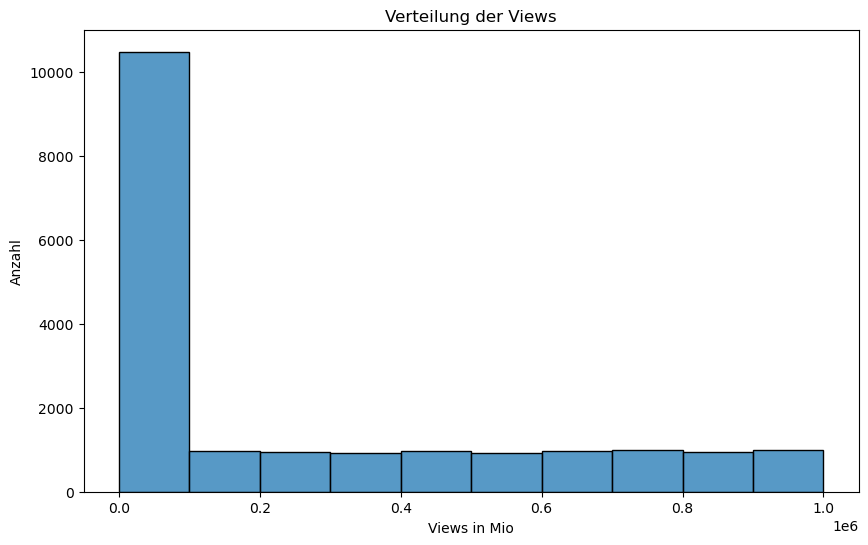

In [26]:
# histogramm für die Verteilung der Views 
# x - Achse von 0 bis 1 Mio in 100k Schritten

plt.figure(figsize=(10,6))
sns.histplot(df['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Verteilung der Views')
plt.xlabel(xlabel="Views in Mio")
plt.ylabel(ylabel="Anzahl")
plt.show()

# Diese Variable ist sehr ungleichmäßig verteilt. 
# Mehr als die Hälfte der Videos werden weniger als 100.000 Mal angesehen. 
# Die Verteilung der Aufrufzahlen > 100.000 ist gleichmäßig.

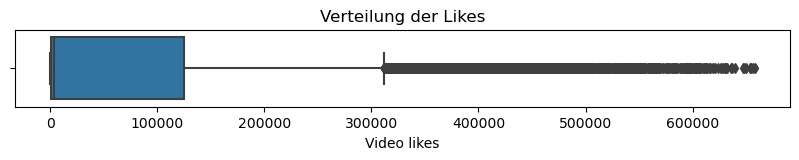

In [27]:
# boxplot der Likes

plt.figure(figsize=(10,1))
plt.title('Verteilung der Likes')
sns.boxplot(x=df['video_like_count'])
plt.xlabel(xlabel="Video likes")
plt.show()


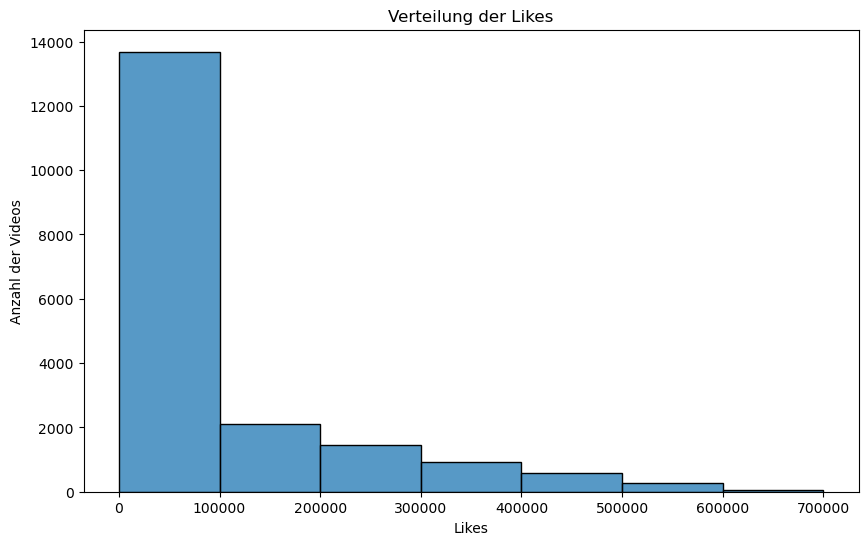

In [28]:
# histogram für die Verteilung der likes

plt.figure(figsize=(10, 6))
plt.title("Verteilung der Likes")
sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
plt.xlabel(xlabel="Likes")
plt.ylabel(ylabel="Anzahl der Videos")
plt.show()

# Ähnlich wie bei der Anzahl der Aufrufe gibt es weitaus mehr Videos mit weniger als 100.000 Likes als Videos mit mehr. 
# In diesem Fall ist jedoch eher eine Verjüngung zu erkennen, 
# da die Daten nach rechts verzerrt sind und viele Videos am oberen Ende der Like-Anzahl liegen.

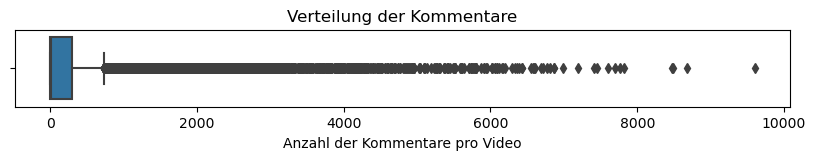

In [29]:
# boxplot für die Verteilung von `video_comment_count`

plt.figure(figsize=(10,1))
plt.title('Verteilung der Kommentare')
sns.boxplot(x=df['video_comment_count'])
plt.xlabel(xlabel="Anzahl der Kommentare pro Video")
plt.show()

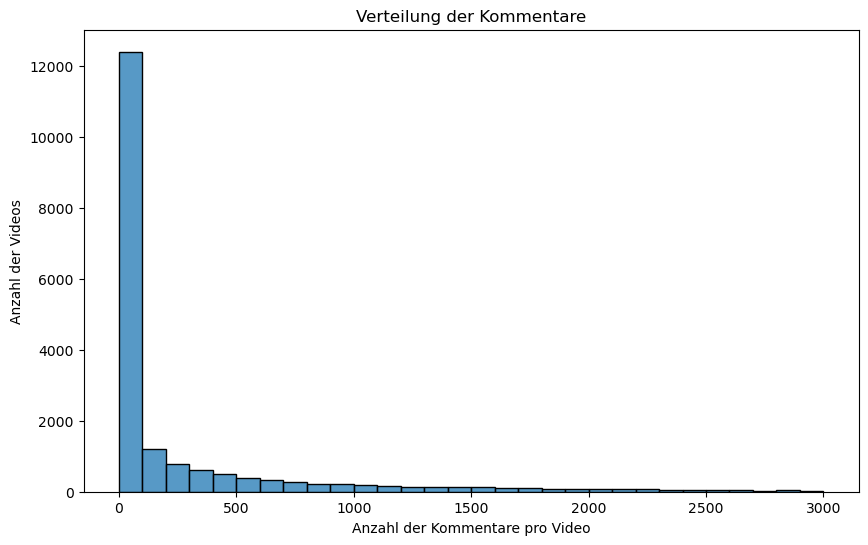

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100))
plt.title('Verteilung der Kommentare')
plt.xlabel(xlabel="Anzahl der Kommentare pro Video")
plt.ylabel(ylabel="Anzahl der Videos")
plt.show()

# Auch hier ist die überwiegende Mehrheit der Videos am unteren Ende des Wertebereichs für die Anzahl der Videokommentare gruppiert. 
# Die meisten Videos haben weniger als 100 Kommentare. 
# Die Verteilung ist sehr rechtsschief.

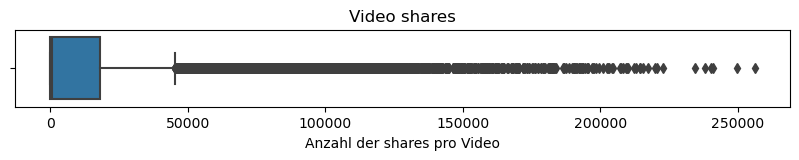

In [31]:
# boxplot Verteilung von `video_share_count`

plt.figure(figsize=(10,1))
plt.title('Video shares')
sns.boxplot(x=df['video_share_count'])
plt.xlabel(xlabel="Anzahl der shares pro Video")
plt.show()

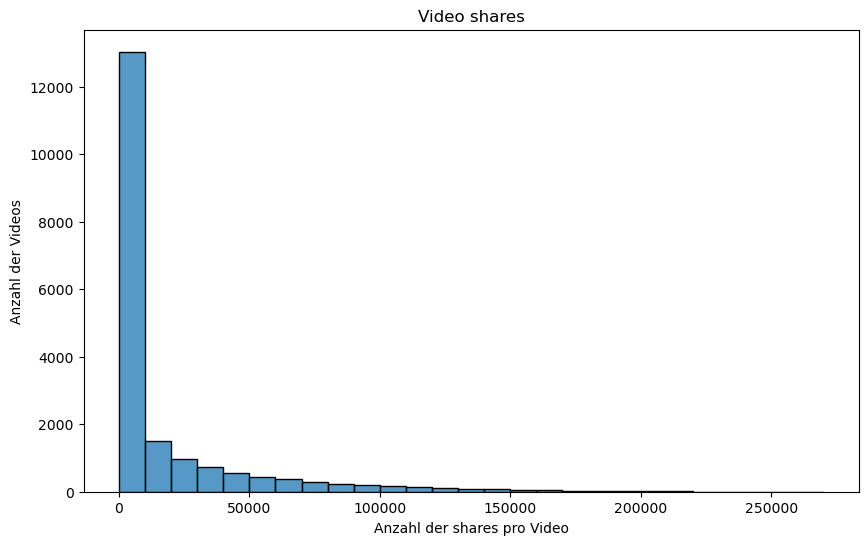

In [32]:
# histogram Verteilung von `video_share_count`

plt.figure(figsize=(10,6))
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video shares')
plt.xlabel(xlabel="Anzahl der shares pro Video")
plt.ylabel(ylabel="Anzahl der Videos")
plt.show()

# Die überwiegende Mehrheit der Videos wurde weniger als 10.000 Mal geteilt. 
# Die Verteilung ist stark nach rechts verzerrt.


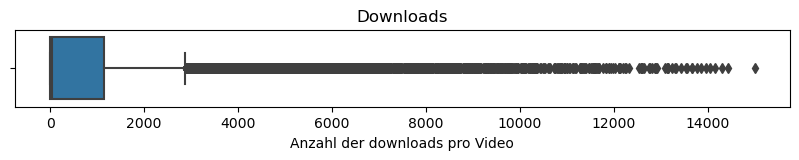

In [33]:
# boxplot für die Verteilung von `video_download_count`

plt.figure(figsize=(10,1))
plt.title('Downloads')
sns.boxplot(x=df['video_download_count'])
plt.xlabel(xlabel="Anzahl der downloads pro Video")
plt.show()

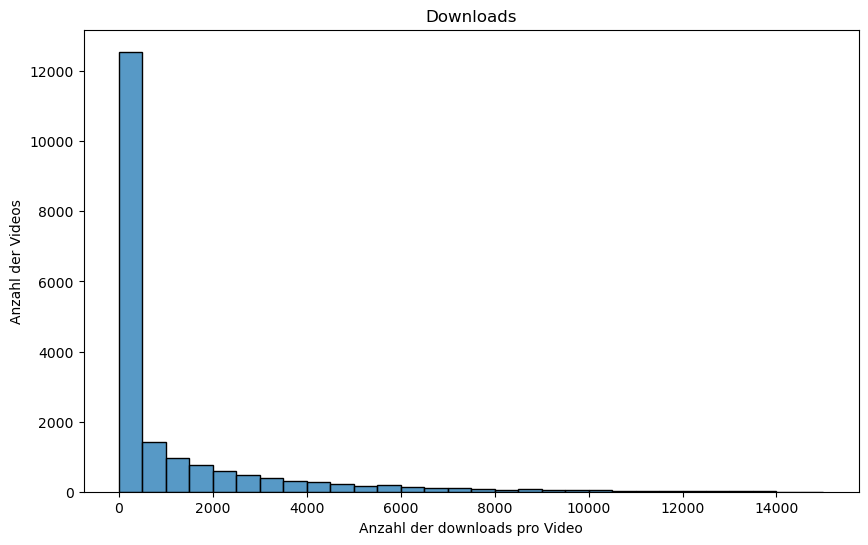

In [34]:
# histogram für die Verteilung von `video_download_count`

plt.figure(figsize=(10,6))
sns.histplot(df['video_download_count'], bins=range(0,(15001),500))
plt.title('Downloads')
plt.xlabel(xlabel="Anzahl der downloads pro Video")
plt.ylabel(ylabel="Anzahl der Videos")
plt.show()

# Die meisten Videos wurden weniger als 500 Mal heruntergeladen, einige jedoch über 12.000 Mal. 
# Auch hier sind die Daten stark nach rechts verzerrt.